<a href="https://colab.research.google.com/github/cdiegor/Metaheuristicas/blob/main/PCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

O problema do caixeiro viajante (PCV ou TSP) faz a seguinte pergunta: "dada uma lista de cidades e as distâncias entre cada par de cidades, qual é a rota mais curta possível que visita cada cidade exatamente uma vez e retorna ao cidade de origem?" É um problema NP-difícil em otimização combinatória, importante em ciência da computação teórica e pesquisa operacional.

O problema do comprador viajante e o problema de roteamento de veículos são generalizações do PCV.

Na teoria da complexidade computacional, a versão de decisão do TSP (onde dado um comprimento L, a tarefa é decidir se o grafo tem um percurso de no máximo L) pertence à classe de problemas NP-completos. Assim, é possível que o tempo de execução do pior caso para qualquer algoritmo para o TSP aumente superpolinomialmente (mas não mais que exponencialmente) com o número de cidades.

O problema foi formulado pela primeira vez em 1930 e é um dos problemas mais intensamente estudados em otimização. Ele é usado como referência para muitos métodos de otimização. Embora o problema seja computacionalmente difícil, muitas heurísticas e algoritmos exatos são conhecidos, de modo que algumas instâncias com dezenas de milhares de cidades podem ser resolvidas completamente e mesmo problemas com milhões de cidades podem ser aproximados em uma pequena fração de 1% (o que dizer de um problema com todas as cidades do mundo? https://www.math.uwaterloo.ca/tsp/world/)

O PCV tem diversas aplicações mesmo em sua formulação mais pura, como planejamento, logística e fabricação de microchips. Ligeiramente modificado, aparece como um subproblema em muitas áreas, como no sequenciamento de DNA. Nessas aplicações, o conceito de cidade representa, por exemplo, clientes, pontos de solda ou fragmentos de DNA, e o conceito de distância representa tempo ou custo de viagem, ou uma medida de similaridade entre fragmentos de DNA. O PCV também aparece na astronomia, pois os astrônomos que observam muitas fontes desejam minimizar o tempo gasto movendo o telescópio entre as fontes; em tais problemas, o PCV pode ser inserido em um problema de controle ótimo. Em muitas aplicações, podem ser impostas restrições adicionais, como recursos limitados ou janelas de tempo.

Fonte: Wikipedia. *Travelling salesman problem*. Acessível em https://en.wikipedia.org/wiki/Travelling_salesman_problem

## Créditos

A maior parte dos códigos, ideias, figuras foram inspiradas ou obtidas de Jupyter at Bryn Mawr College, *The Traveling Salesperson Problem*. Acessível em https://jupyter.brynmawr.edu/services/public/dblank/jupyter.cs/FLAIRS-2015/TSPv3.ipynb

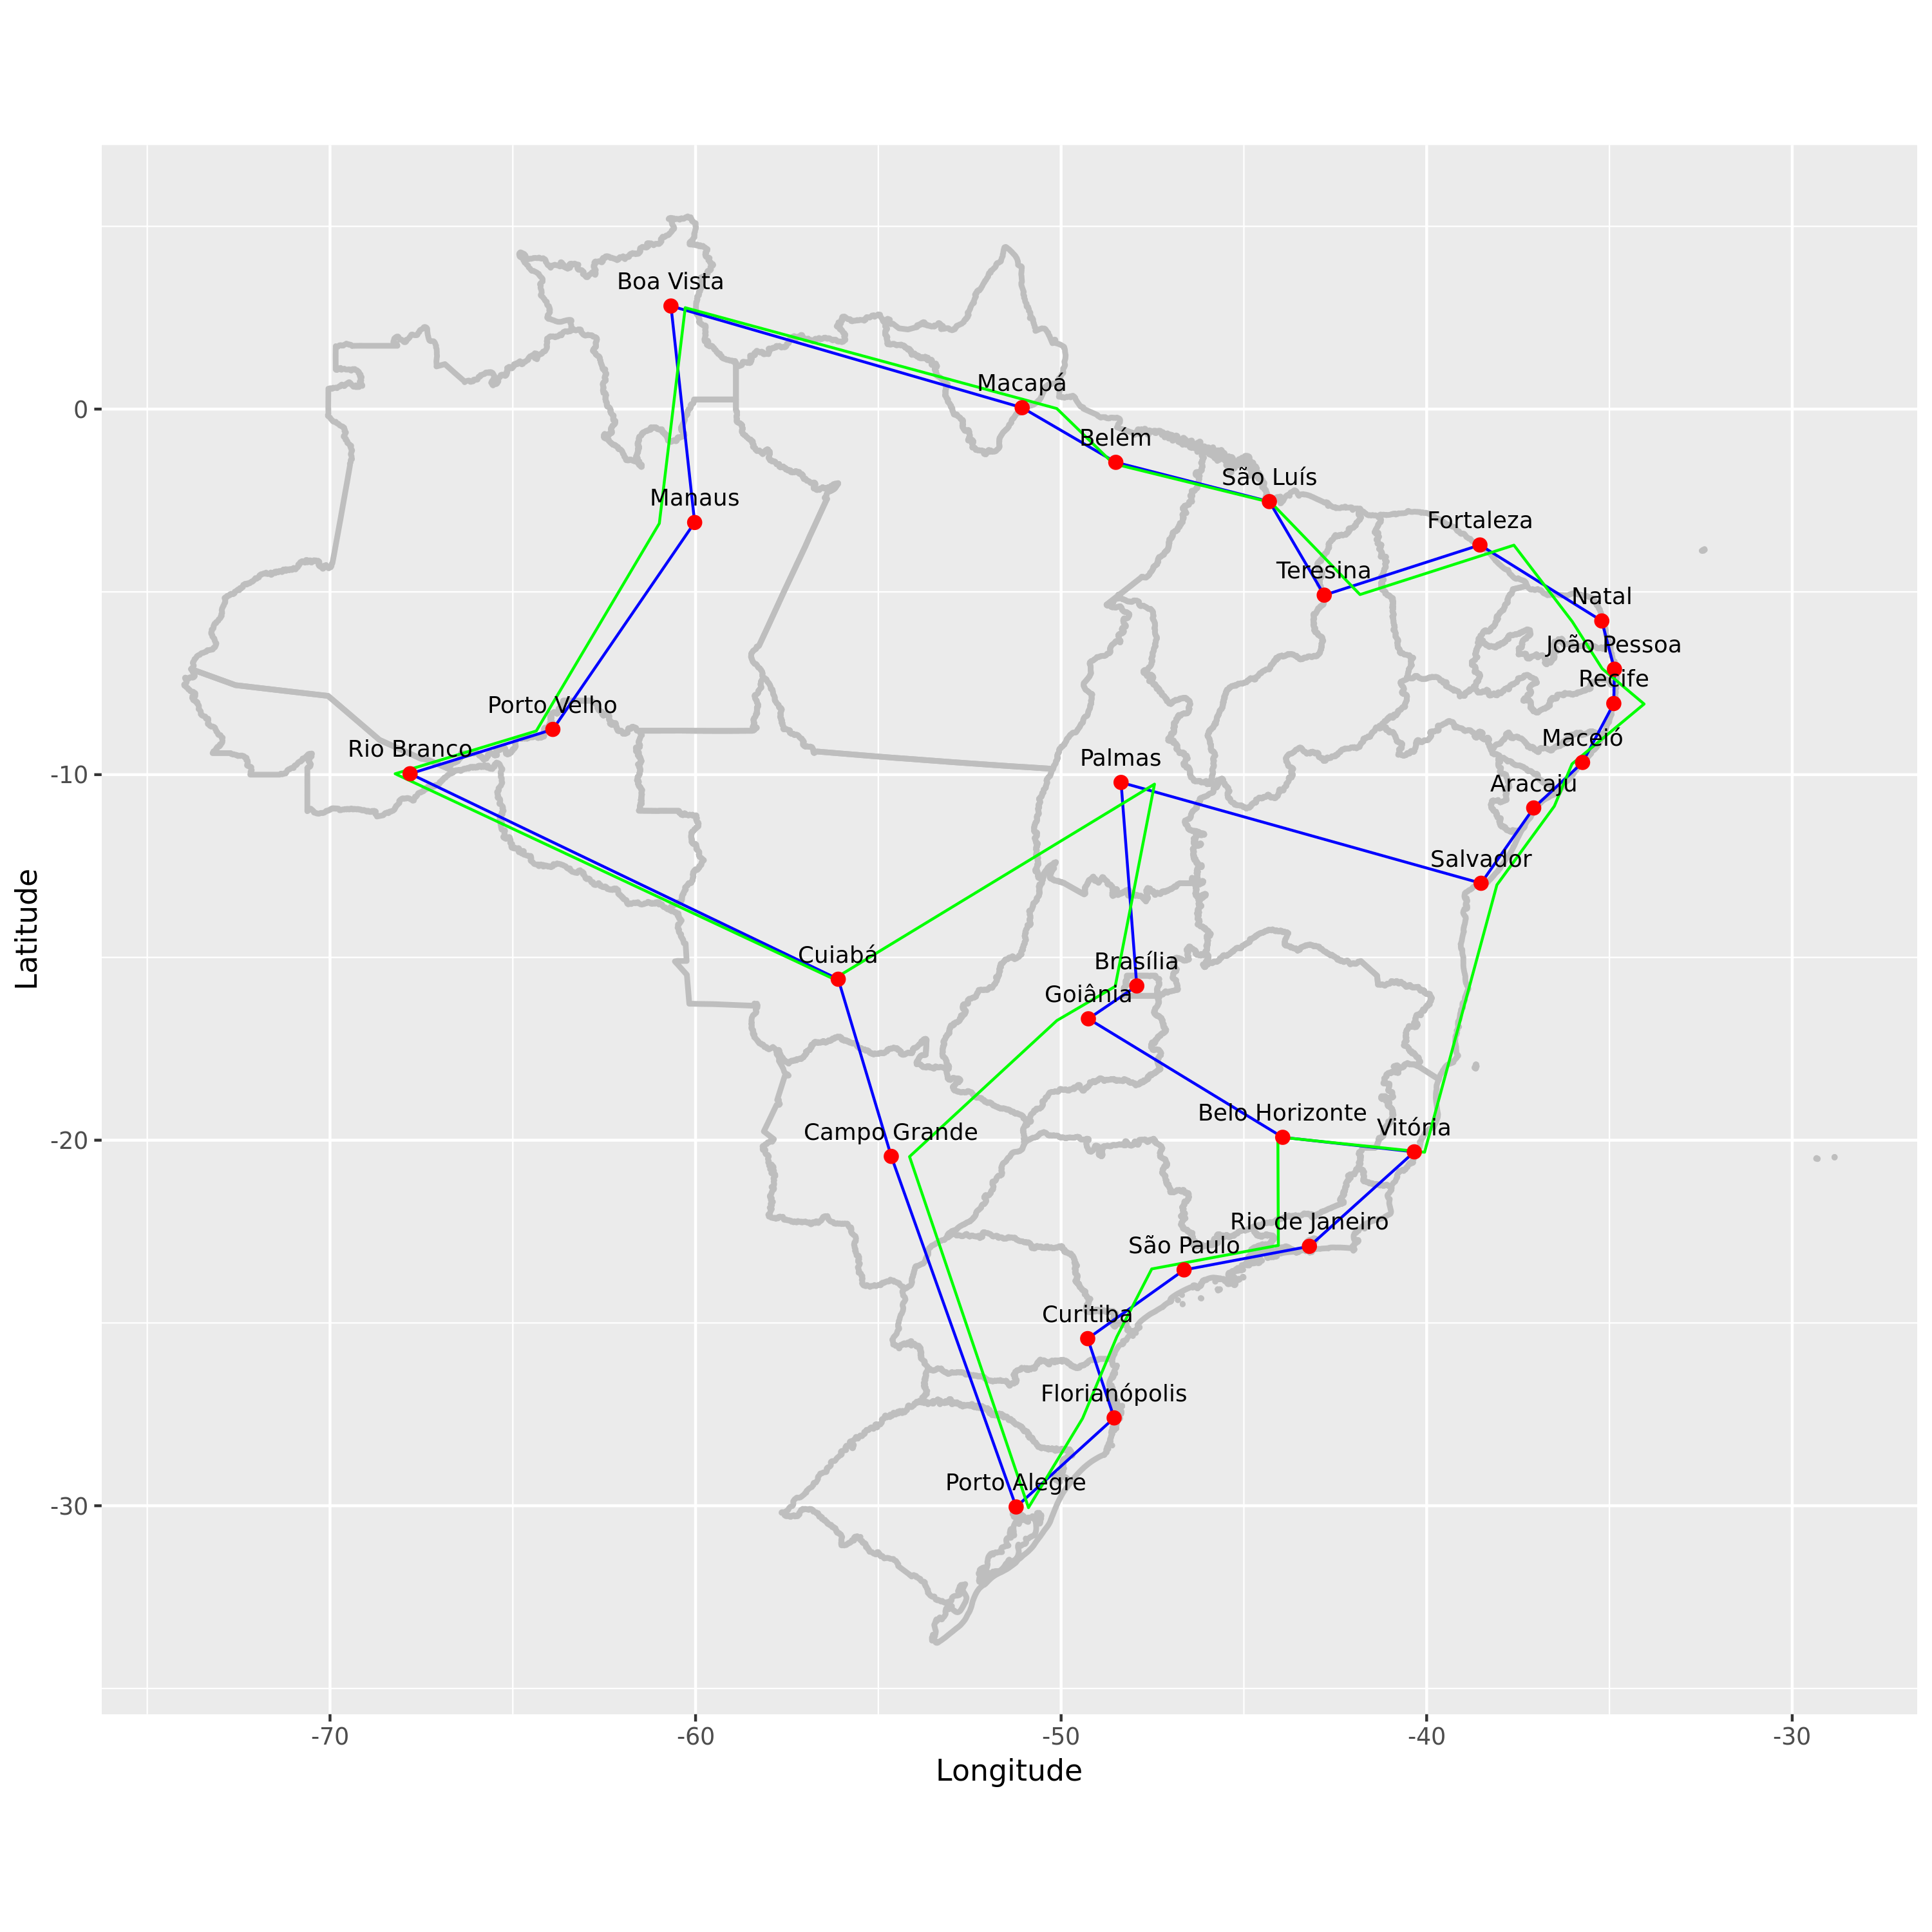

Fonte: Dan S. Reznik, *TSP for Brazilian State Capitals*. Acessível em https://github.com/dan-reznik/TSP-Brazilian-Capitals/blob/master/pics/tsp%20brazil%20ibge%20state%20polygons.png

# Todas as possíveis rotas

Embora saibamos que esta não é uma maneira prática de abordar casos com um número razoável de cidades, vamos começar com o algoritmo força bruta, ou seja, a enumeração de todas as possíveis rotas.

In [ ]:
import matplotlib.pyplot as plt
import math
import random
import time
import itertools
import urllib
import csv

In [ ]:
def forca_bruta(cidades):
    "Gera todas as possíveis rotas e escolhe a menor delas."
    return rota_mais_curta(todas_as_rotas(cidades))

def rota_mais_curta(rotas): 
    "Escolhe a rota com menor tamanho."
    return min(rotas, key=tamanho_rota)

# TO DO: Tipos de dados: cidades, rotas, Funções: todas_as_rotas, tamanho_rota

**Detalhe**: no Python min(*conjunto, key=função*) significa achar o elemento que minimiza a função passada como chave.

## Representando uma rota

Uma rota pode ser representada por uma permutação das cidades a serem passadas. A ordem em que elas aparecem determina as distâncias a serem percorridas,pois duas cidades adjacentes representam um percurso.

In [ ]:
todas_as_rotas = itertools.permutations

In [ ]:
#Exemplo

cidades = [1, 2, 3, 4]
list(todas_as_rotas(cidades))

In [ ]:
def tamanho_rota(rota):
  "A distância total percorrida entre dois pares consecutivos em uma rota"
  return sum(distancia(rota[i-1], rota[i]) for i in range(len(rota)))

#TO DO: Função: distancia, Tipo de dados: cidades

**Detalhe**: Aqui usamos um truque específico do Python no qual 

```
distancia(rota[-1], rota[0])
```

 se refere a distância entre o primeiro e o último elemento do vetor rota.

## Representando cidades

Cada cidade será representada como um ponto no espaço euclidiano $\mathbb{R}^2$ e a distância entre duas cidades é a distância euclidiana.

Neste caso temos um PCV simétrico, métrico, euclidiano.

Simétrico significa que a relação de distância é simétrica, ou seja: $\forall u, v \ : \ distancia(u,v) = distancia(v,u)$

Métrico significa que as distâncias obedecem desigualdades trianguelares, ou seja: $\forall u, v, w \ : \ distancia(u,v) \leq distancia(u, w) + distancia(w, v)$

E finalmente euclidiano significa que a distância euclidiana é a medida de distância utilizada. Essa definição é suficiente para as duas anteriores.




## Computando distâncias

No Python já temos a distância euclidiana disponível na biblioteca matemática, portanto vamos apenas renomeá-la por conveniência nos códigos a seguir:

In [ ]:
distancia = math.dist

In [ ]:
#Exemplo
A = [3, 0]
B = [0, 4]
print(distancia(A,B))

5.0


## Conjunto de cidades aleatórias

Para efeitos de nossos tester vamos considerar inicialmente a geração de instâncias aleatórias. Para isso vamos utilizar a geração de duplas que presentam as coordenadas euclidianas de cada cidade.

In [ ]:
[ [random.randrange(1000), random.randrange(1000)] for c in range(7) ]

[[957, 205],
 [914, 156],
 [216, 614],
 [902, 706],
 [997, 497],
 [72, 767],
 [125, 690]]

Encapsulando isto em uma função e pensando nas dimensões da visualização, escrevemos a seguinte função de geração de uma instância aleatória.

In [ ]:
def Cidades (n, largura=900, altura=600, rseed=233):
  "Faz um conjunto com n cidades, com coordenadas aleatórias no máximo (largura x alutura)"
  random.seed(rseed)
  return [ [random.randrange(largura), random.randrange(altura)] for c in range(n) ]

A seguir usamos a função de geração de um conjunto de 10 cidades e passamos para o algoritmo força bruta, cujo retorno a melhor rota para o caixeiro viajante, escrevendo uma sequência de coordenadas do espaço euclidiano, referentes à rota do caixeiro.

In [ ]:
forca_bruta(Cidades(10))

([698, 178],
 [710, 14],
 [85, 104],
 [78, 243],
 [275, 239],
 [537, 236],
 [564, 209],
 [620, 232],
 [819, 495],
 [767, 291])

## Desenhando a solução

Para entender melhor o que se passa na solução apresentada pelos algoritmos vamos elaborar uma visualização simples da instância e da rota. Caso o parâmetro "completa" seja verdadeiro, vamos imprimir as arestas entre qualquer par de vértices.

In [ ]:
def plot_rota(rota, completa=True):
  x = []
  y = []
  for i in range(len(rota)):
    x.append(rota[i][0])
    y.append(rota[i][1])

  if (completa):
    for i in range(len(rota)-1):
      for j in range(i+1,len(rota)):
        plt.plot([x[i], x[j]], [y[i], y[j]], color="LightGray", linewidth=1)

  for i in range(len(rota)):
    plt.plot([x[i], x[i-1]], [y[i], y[i-1]], color="Red", linewidth=2)

  plt.scatter(x, y, color="Blue", linewidth=3)

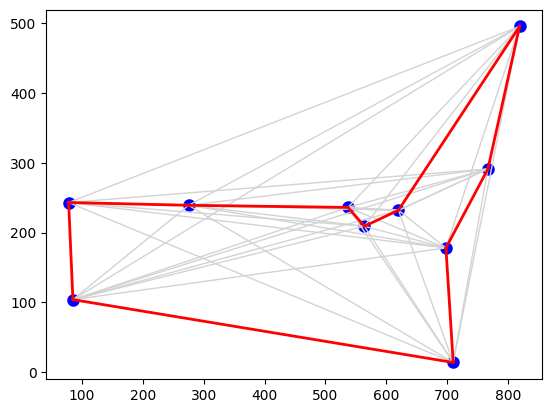

In [ ]:
plot_rota(forca_bruta(Cidades(10)))

## Complexidade de enumerar todas as rotas
Demora cerca de 2 segundos na minha máquina para resolver este problema de 10 cidades. Em geral, a função TSP considera (n-1)! passeios para um problema de n cidades, e cada passeio tem n cidades, então o tempo total necessário para n cidades deve ser aproximadamente proporcional a n!. Isso significa que o tempo cresce rapidamente com o número de cidades. Realmente rapidamente. Esta tabela mostra o tempo real para resolver um problema de 10 cidades e o tempo esperado para resolver problemas maiores:



 |n	|tempo esperado|
  |:- |:-|
  |10	|10! rotas = 2 seg|
  |11	|2 seg × 11! / 10! ≈ 22 seg|
  |12	|2 seg × 12! / 10! ≈ 4 min|
  |14	|2 seg × 14! / 10! ≈ 13 horas|
  |16	|2 seg × 16! / 10! ≈ 200 dias|
  |18	|2 seg × 18! / 10! ≈ 112 anos|
  |25	|2 seg × 25! / 10! ≈ 270 bilhões de anos|


Vamos precisar de uma forma melhor...

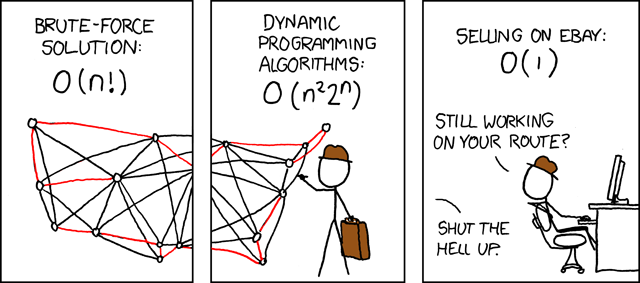

Fonte: Randall Munroe. *Travelling Salesman Problem*. Acessível em https://xkcd.com/399/

# Heurísticas construtivas

E se estivermos dispostos a nos contentar com um passeio curto, mas sem garantia de ser o mais curto? Então, podemos economizar bilhões de anos de tempo de computação: mostraremos algoritmos aproximados, que encontram passeios que normalmente estão dentro de 10% do passeio mais curto possível e podem lidar com milhares de cidades em poucos segundos. (Observação: existem algoritmos aproximados mais sofisticados que podem lidar com centenas de milhares de cidades e chegar a 0,01% ou mais do passeio mais curto possível.)

Então, como chegamos a um algoritmo aproximado? Aqui estão dois planos gerais de como criar um tour:



*   **Algoritmo do vizinho mais próximo**: Faz o tour ir de uma cidade até sua vizinha mais próxima. Repita.
*   **Algoritmo guloso**: Encontre a distância mais curta entre quaisquer duas cidades e inclua essa aresta no passeio sem formar trevos ou subciclos. Repita.         






Vamos expandir essas ideias em algoritmos completos.


## Vizinho mais próximo

Uma heurística construtiva que surge como uma primeira ideia é a seguinte: a partir de uma nó inicial, escolher para qual nó ir em seguida simplesmente selecionando o trajeto mais curto.

Esta é uma estratégia gulosa, pois a cada instante em que uma decisão precisa ser tomada para a construção da rota, o critério de otimização é usado sem que haja posteriormente uma reconsideração sobre aquela decisão.


In [ ]:
def vizinho_mais_proximo(cidades):
    """Comece a rota na primeira cidade; a cada passo estenda a rota
    movendo-se da cidade anterior para a vizinha mais próxima
    que ainda não foi visitada."""
    primeira = cidades[0]
    rota = [primeira]
    inexploradas = cidades.copy()
    inexploradas.remove(primeira)
    while inexploradas:
        C = mais_proxima(rota[-1], inexploradas)
        rota.append(C)
        inexploradas.remove(C)
    return rota

def mais_proxima(c, cidades):
    "Encontre a cidade mais próxima da cidade c."
    return min(cidades, key=lambda x: distancia(c, x))

Detalhe: Em Python, assim como na teoria da computação, lambda (ou λ) é o símbolo para função, então "lambda x: distancia(c, x)" significa a função de x que calcula a distância de x para a cidade c.

Podemos comparar o rápido (porém inexado) algoritmo de vizinho mais próximo ao lento (porém exato) algoritmo de enumeração de todas as rotas para um conjunto pequeno:

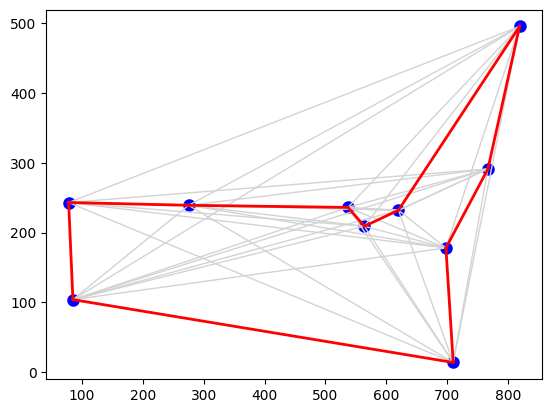

In [ ]:
plot_rota(forca_bruta(Cidades(10)))

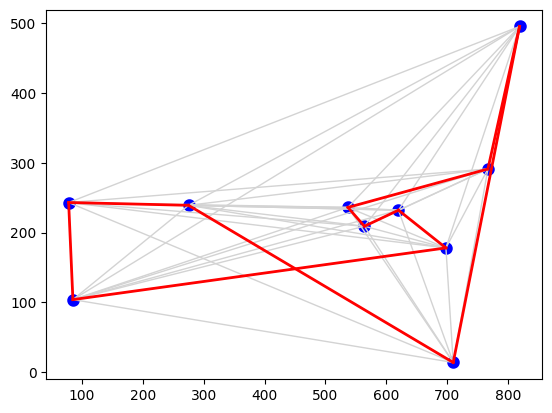

In [ ]:
plot_rota(vizinho_mais_proximo(Cidades(10)))

Outra forma de compara é saber a qual a distância percentual da melhor solução obtida para a solução ótima dada pelo algoritmo que enumera todas as rotas. Essa distância é conhecida como *gap*.

In [ ]:
def gap(cidades): 
    "Gap percentual entre o algoritmo de vizinho mais próximo e o algoritmo de todas as rotas."
    opt = tamanho_rota(forca_bruta(cidades))
    cnd = tamanho_rota(vizinho_mais_proximo(cidades))
    return  (cnd-opt)/opt 

Para um resultado mais confiável podemos rodar um número maior de vezes.

In [ ]:
gaps = sorted(gap(Cidades(10, rseed=i)) for i in range(10))
[ print("{0:0.2f}".format(x)) for x in gaps ]
mean = sum(gaps)/len(gaps)
print("Media = ", "{0:0.2f}".format(mean))
print("Desvio Padrão = ", "{0:0.2f}".format( ( sum([((x - mean) ** 2) for x in gaps]) / len(gaps) ) **0.5 ) )

0.00
0.00
0.00
0.15
0.19
0.20
0.23
0.24
0.25
0.29
Media =  0.15
Desvio Padrão =  0.11


Sabemos que é pior, mas podemos agora dar respostas para uma entrada com centenas ou milhares de cidades. 

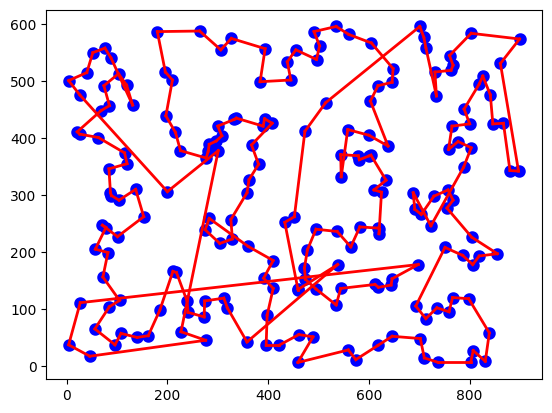

In [ ]:
plot_rota(vizinho_mais_proximo(Cidades(200)),completa=False)

### Resultados podem variar dependendo do ponto de partida

A cidade inicial escolhida define toda a sequência de decisões que serão tomadas. Ao mudarmos a cidade inicial, é possível observar leves variações sobre a rota utilizada. Vamos então definir um algoritmo em que é possível selecionar o ponto de partida e avaliar como isso pode variar.

In [ ]:
def vmp(cidades, inicio):
    """Comece a rota na primeira cidade; a cada passo estenda a rota
    movendo-se da cidade anterior para a vizinha mais próxima
    que ainda não foi visitada."""
    primeira = cidades[inicio]
    rota = [primeira]
    inexploradas = cidades.copy()
    inexploradas.remove(primeira)
    while inexploradas:
        C = mais_proxima(rota[-1], inexploradas)
        rota.append(C)
        inexploradas.remove(C)
    return rota


Se quisermos obter o melhor valor possível com essa heurística podemos executá-la para todos as cidades como ponto inicial.

In [ ]:
def vmp_completa(cidades):
  return rota_mais_curta([ vmp(cidades, i) for i in range(len(cidades))])
    

A seguir vamos fazer comparações com as rotas geradas a partir de pontos diferentes e a melhor rota possível com esta estratégia.

Tamanho =  10799.126338818005


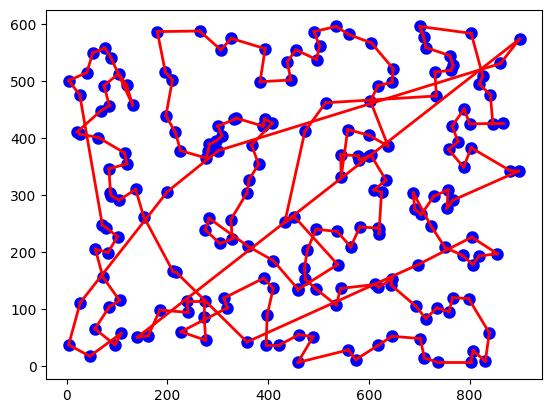

In [ ]:
rota = vmp(Cidades(200), 122)
print("Tamanho = ", tamanho_rota(rota) )
plot_rota(rota,completa=False)

Tamanho =  10226.428015396954


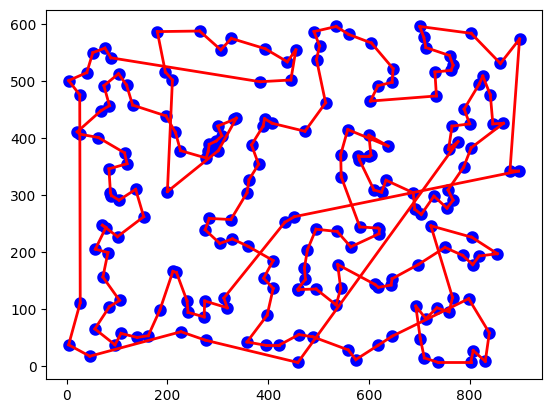

In [ ]:
rota = vmp(Cidades(200), 78)
print("Tamanho = ", tamanho_rota(rota) )
plot_rota(rota,completa=False)

Tamanho =  9947.59311490794


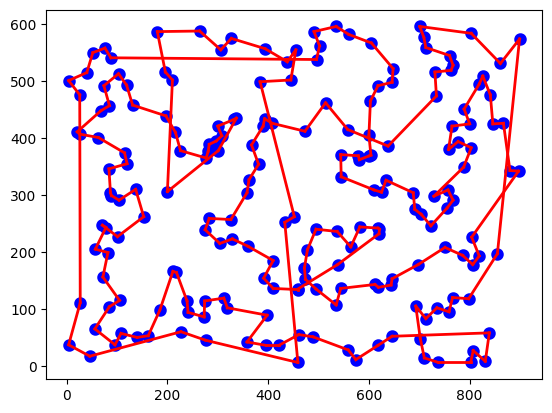

In [ ]:
rota = vmp(Cidades(200), 13)
print("Tamanho = ", tamanho_rota(rota) )
plot_rota(rota,completa=False)

Tamanho =  9348.6722200493


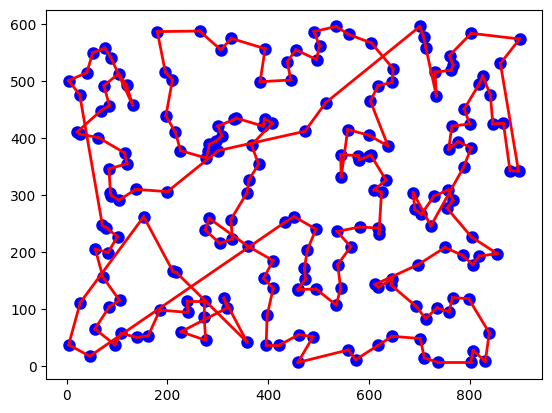

In [ ]:
rota = vmp_completa(Cidades(200))
print("Tamanho = ", tamanho_rota(rota) )
plot_rota(rota,completa=False)

### Caso ruim: outliers

É possível construir casos onde a estratégia de partir de uma cidade para a mais próxima acaba gerando uma sobrecarga muito grande para as cidades deixadas para o final da rota.

Um exemplo pode ser visto a seguir.

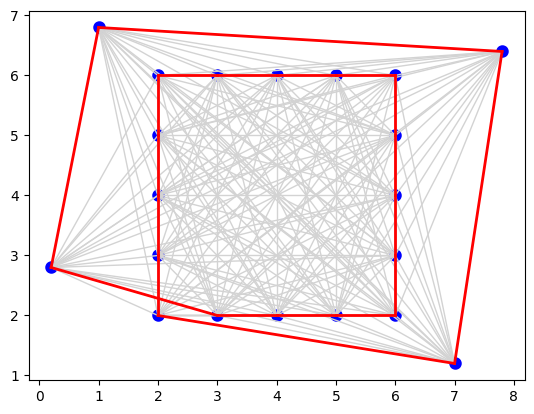

In [ ]:
outliers = [[2, 2],  [2, 3],  [2, 4],  [2, 5],  [2, 6],  
                 [3, 6],  [4, 6],  [5, 6],  [6, 6],  
                 [6, 5],  [6, 4],  [6, 3],  [6, 2],  
                 [5, 2],  [4, 2],  [3, 2],  
                 [1, 6.8],  [7.8, 6.4],  [7, 1.2],  [0.2, 2.8]]

plot_rota(vizinho_mais_proximo(outliers))

## Heurística gulosa para o PCV

Uma possibilidade para superar a "miopia" das escolhas locais seria olhar para todas as arestas do grafo antes de tomar uma decisão. Neste sentido a heurística gulosa trabalha com o conjunto de todas as arestas e em ordem crescente de distância verifica se ela pode ser incluída na rota, sem que isto forme trevos ou subciclos.

De fato o algoritmo vai trabalha com um vetor que indica para cada vértice se ele pode se conectar a um outro vértice. Isto só é possível se estes candidatos a uma conexão forem nós terminais dos segmentos que compomos no processo de construção da rota. Guardamos portanto o segmento para qual cada vértica é um terminal. Note que inicialmente todos são terminais de um segmento unitário.

In [ ]:
def guloso(cidades, verbose=False):
    """Percorre todas as arestas em ordem crescente e escolhe a primeira 
        possível para fazer parte da solução"""
    arestas = ordena_arestas(cidades)
    terminais = [ [c] for c in range(len(cidades)) ] # A dict of {endpoint: segment}
    for [u,v] in arestas:
        if terminais[u] != [] and terminais[v] != [] and terminais[u] != terminais[v]:
            rota = unir(terminais, u, v, verbose)
            if len(rota) == len(cidades):
                rota = [ cidades[rota[i]] for i in range(len(cidades)) ]
                return rota
            
# TO DO: functions: ordena_arestas, unir

As arestas no algoritmo anterior são visitadas em ordem de tamanho. Para ordená-las utilizamos o código a seguir.

In [ ]:
def ordena_arestas(cidades):
  "Retorna todas as arestas em uma lista ordenada pelo tamanho."
  arestas = [ [u, v] for u in range(len(cidades)) for v in range(len(cidades)) if u < v]
  return sorted(arestas, key=lambda aresta : distancia(cidades[aresta[0]], cidades[aresta[1]]))

Uma vez que identificamos uma aresta que conecta segmentos distintos pelos seus nós terminais, fazemos apelo a função unir definida abaixo para atualizar a lista de terminais.

In [ ]:
def unir(terminais, u, v, verbose=False):
    "Une o segmento de u ao segmento de v, mantendo o vetor de terminais"
    useg, vseg = terminais[u], terminais[v]
    if (verbose) : print(useg, "(+) ", vseg, " => ", end='')
    if useg[-1] is not u: useg.reverse()
    if vseg[0] is not v: vseg.reverse()
    useg.extend(vseg)
    if (verbose) : print(useg)
    terminais[u] = []
    terminais[v] = []
    terminais[useg[0]] = terminais[useg[-1]] = useg
    return useg

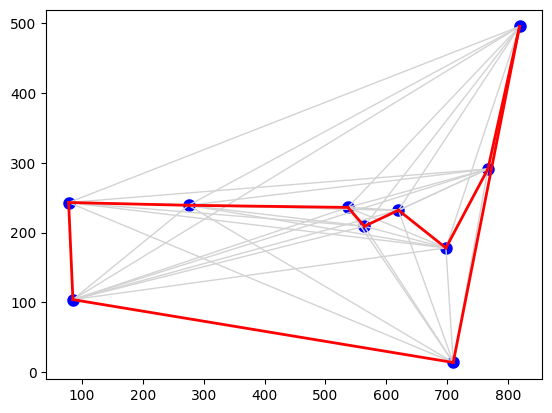

In [ ]:
plot_rota(guloso(Cidades(10)))

A seguir observamos o desempenho do método, ligeiramente melhorado, para o caso dos outliers.

[0] (+)  [1]  => [0, 1]
[0, 1] (+)  [15]  => [1, 0, 15]
[1, 0, 15] (+)  [2]  => [15, 0, 1, 2]
[15, 0, 1, 2] (+)  [3]  => [15, 0, 1, 2, 3]
[15, 0, 1, 2, 3] (+)  [4]  => [15, 0, 1, 2, 3, 4]
[15, 0, 1, 2, 3, 4] (+)  [5]  => [15, 0, 1, 2, 3, 4, 5]
[15, 0, 1, 2, 3, 4, 5] (+)  [6]  => [15, 0, 1, 2, 3, 4, 5, 6]
[15, 0, 1, 2, 3, 4, 5, 6] (+)  [7]  => [15, 0, 1, 2, 3, 4, 5, 6, 7]
[15, 0, 1, 2, 3, 4, 5, 6, 7] (+)  [8]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8] (+)  [9]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9] (+)  [10]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] (+)  [11]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] (+)  [12]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] (+)  [13]  => [15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] (+)  [14]  => [15, 0,

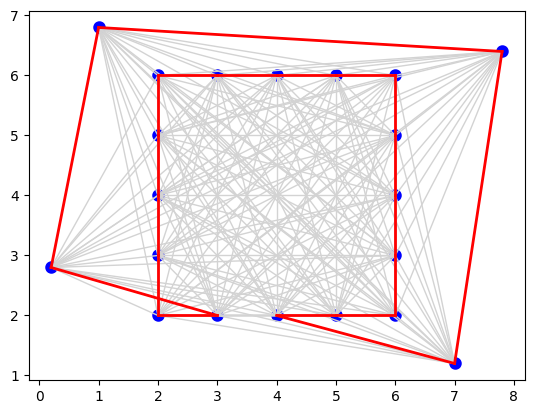

In [ ]:
outliers = [[2, 2],  [2, 3],  [2, 4],  [2, 5],  [2, 6],  
                 [3, 6],  [4, 6],  [5, 6],  [6, 6],  
                 [6, 5],  [6, 4],  [6, 3],  [6, 2],  
                 [5, 2],  [4, 2],  [3, 2],  
                 [1, 6.8],  [7.8, 6.4],  [7, 1.2],  [0.2, 2.8]]

plot_rota(guloso(outliers, verbose=True))

## Procedimento de lapidação

Um dos ingredientes fundamentais para o funcionamento das metaheurísticas de trajetória é conseguir, a partir de uma solução, fazer ajustes para obter uma nova solução. Este processo de modificação é onipresente nesse tipo de heurística.

Aqui propomos uma modificação em que tomamos duas arestas $(u,v)$ e $(x,y)$ pertencentes a uma solução e propomos uma nova solução com as arestas $(u, x)$ e $(v, y)$. Para que isto seja possível também é preciso reverter (sem alteração de custo, já que estamos no caso simétrico) o caminho de $x$ para $y$ ou de $u$ para $v$

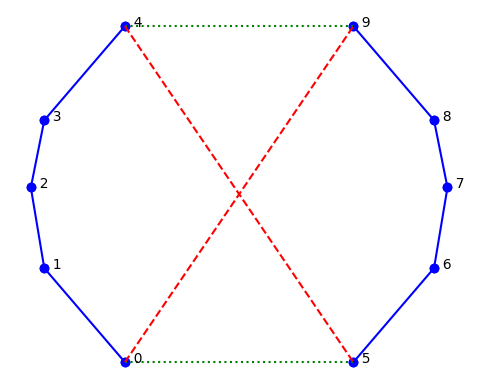

In [ ]:
def plot_linhas(cidades, style='bo-'):
    "Plot lines to connect a series of points."
    x = [ p[0] for p in cidades ]
    y = [ p[1] for p in cidades ]
    plt.plot(x, y, style)
    plt.axis('scaled'); plt.axis('off')

def plot_nomes_linhas(cidades, *args):
    plot_linhas(cidades, 'bo')
    for (label, p) in enumerate(cidades):
        plt.text(p[0], p[1], '  '+str(label))
    # Draw lines indicated by args
    style = 'bo-'
    for arg in args:
        if isinstance(arg, str):
            style = arg
        else: # arg is a list of indexes into points, forming a line
            Xs = [cidades[i][0] for i in arg]
            Ys = [cidades[i][1] for i in arg]
            plt.plot(Xs, Ys, style)
    plt.axis('scaled'); plt.axis('off'); plt.show()       

cross = [ [9, 3],  [3, 10],  [2, 16],  [3, 21],  [9, 28], 
         [26, 3], [32, 10], [33, 16], [32, 21], [26, 28] ]

plot_nomes_linhas(cross, 'bo-', range(5), range(5, 10), 
                          'g:', (4, 9), (0, 5), 
                          'r--', (4, 5), (0, 9))

In [ ]:
def reverter(rota, i, j):
    "Se a reversão da rota [i:j] for mais curta então reverta." 
    u, v, x, y = rota[i-1], rota[i], rota[j-1], rota[j % len(rota)]
    if distancia(u, v) + distancia(x, y) > distancia(u, x) + distancia(v, y):
        rota[i:j] = reversed(rota[i:j])

A seguir escrevemos um algoritmo que passa por todos os seguimentos da rota e verifica se é vantajoso alterar a rota.

In [ ]:
def alterar_rota(rota):
    "Procura todas as possíveis reversões de segmentos"
    segmentos = todos_segmentos(len(rota))
    while True:
      tamanho_atual = tamanho_rota(rota)
      for (u, v) in segmentos:
        reverter(rota, u, v)
      if tamanho_rota(rota) >= tamanho_atual: break
    return rota

def todos_segmentos(n):
    "Retorna todos os pares que formam segmentos de caminho numa rota de tamanho n."
    return [(u, u + t)
            for t in range(n, 1, -1)
            for u in range(n - t + 1)]

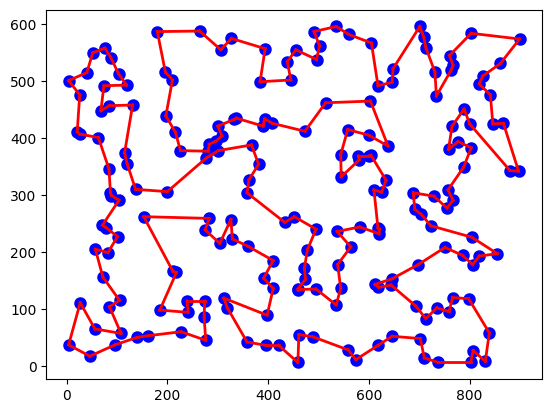

In [ ]:
plot_rota(alterar_rota(vmp_completa(Cidades(200))), completa=False)

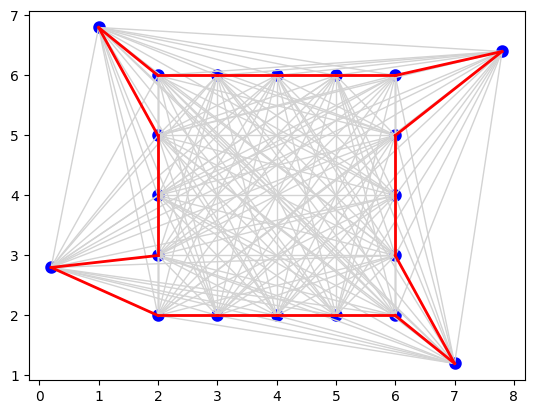

In [ ]:
outliers = [[2, 2],  [2, 3],  [2, 4],  [2, 5],  [2, 6],  
                 [3, 6],  [4, 6],  [5, 6],  [6, 6],  
                 [6, 5],  [6, 4],  [6, 3],  [6, 2],  
                 [5, 2],  [4, 2],  [3, 2],  
                 [1, 6.8],  [7.8, 6.4],  [7, 1.2],  [0.2, 2.8]]

plot_rota(alterar_rota(guloso(outliers)))

# Exercícios


1.   Com a heurística de vizinho mais próximo ```vmp```, verificamos que o ponto inicial pode alterar o valor da solução obtida. Avaliamos que poderíamos rodar o método para todos os possíveis pontos iniciais e pegar a melhor solução, ```vmp_completa```. Contudo isso pode ser bastante custoso. Elabore um método ```vmp_amostral``` que realiza uma amostra das cidades e constrói um conjunto de pontos iniciais amostral com 10% das cidades. Verifique como isso se compara ao valor de ```vmp_completa```

2.   O procedimento de lapidação ```reverter``` é uma modificação seletiva de uma solução, também conhecida, na literatura do problema do caixeiro viajante, como 2-OPT. Elabore um algoritmo do tipo subida da colina com (re-)início aleatório utilizando este procedimento. Compare o desempenho desta heurística com o desempenho dos algoritmos construtivos propostos. 

